In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_excel('shoe.xlsx')
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [3]:
df.rename(columns={"size(cm)":"size", "class(y)":"gender"}, inplace=True)
df.head()

,size,gender
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


## Categorical columns

In [4]:
df.dtypes

size      float64
gender     object
dtype: object

In [5]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

## Encoding

In [6]:
df.gender = df.gender.replace(['Female', 'Male'],[0,1])
df.head()

,size,gender
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


## Check for null

In [7]:
df.isnull().any()

size      False
gender    False
dtype: bool

## Remove noisy data

In [8]:
df.drop(index=df[(df['size']<10) & (df['gender']==1)].index, inplace=True)

# Visualization

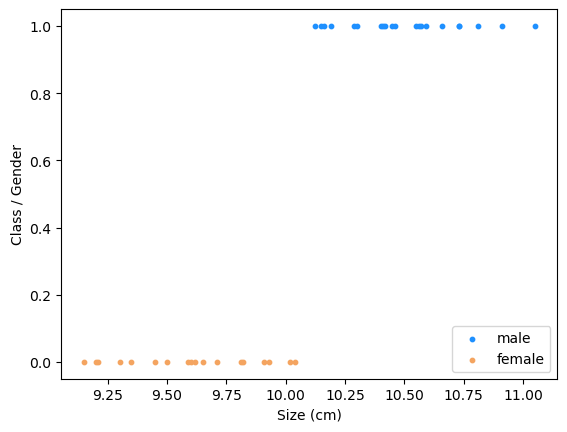

In [9]:
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 0]

plt.scatter(df_male['size'],df_male['gender'], s=10, color="dodgerblue", label="male")
plt.scatter(df_female['size'],df_female['gender'], s=10, color="sandybrown", label="female")
plt.xlabel("Size (cm)")
plt.ylabel("Class / Gender")
plt.legend(loc="lower right")

### Spliting Dataset

In [10]:
X = df[['size']]
y = df['gender']

In [11]:
xtrain, xtest, ytrain, ytest = tts(X, y, test_size=0.3, random_state=15)

# Logistic Regression

In [12]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

LogisticRegression()

In [13]:
log_pred = log.predict(xtest)

In [14]:
log_score = log.score(xtest,ytest)
log_score

1.0

In [15]:
print(f"Slope: {log.coef_}")
print(f"Intercept: {log.intercept_}")

Slope: [[2.48860149]]
Intercept: [-25.04894081]


In [16]:
log_mae = mean_absolute_error(ytest, log_pred)
log_mae

0.0

In [17]:
log_mse = mean_squared_error(ytest, log_pred)
log_mse

0.0

# Decision Tree

In [18]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [19]:
dt_pred = dt.predict(xtest)

In [20]:
dt_score = dt.score(xtest,ytest)
dt_score

1.0

In [21]:
dt_mae = mean_absolute_error(ytest, dt_pred)
dt_mae

0.0

In [22]:
dt_mse = mean_squared_error(ytest, dt_pred)
dt_mse

0.0

# K-nearest neighbors (KNN)

In [23]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [24]:
knn_pred = knn.predict(xtest)

In [25]:
knn_score = knn.score(xtest,ytest)
knn_score

1.0

In [26]:
knn_mae = mean_absolute_error(ytest, knn_pred)
knn_mae

0.0

In [27]:
knn_mse = mean_squared_error(ytest, knn_pred)
knn_mse

0.0

# Evaluation Metrics

## Data Frame

In [28]:
metrics = pd.DataFrame({
    'metrics':['Accuracy Score', 'Mean Absolute Error', 'Mean Squared Error'],
    'Logistic': [log_score, log_mae, log_mse],
    'DT': [dt_score, dt_mae, dt_mse],
    'KNN':[knn_score, knn_mae, knn_mse]})
metrics.head()

,metrics,Logistic,DT,KNN
0,Accuracy Score,1.0,1.0,1.0
1,Mean Absolute Error,0.0,0.0,0.0
2,Mean Squared Error,0.0,0.0,0.0


In [29]:
df2 = pd.melt(metrics,
              id_vars="metrics",
              value_vars=['Logistic','DT','KNN'],
              var_name="Algorithm", value_name="Accuracy")
df2

,metrics,Algorithm,Accuracy
0,Accuracy Score,Logistic,1.0
1,Mean Absolute Error,Logistic,0.0
2,Mean Squared Error,Logistic,0.0
3,Accuracy Score,DT,1.0
4,Mean Absolute Error,DT,0.0
5,Mean Squared Error,DT,0.0
6,Accuracy Score,KNN,1.0
7,Mean Absolute Error,KNN,0.0
8,Mean Squared Error,KNN,0.0


## Visualization

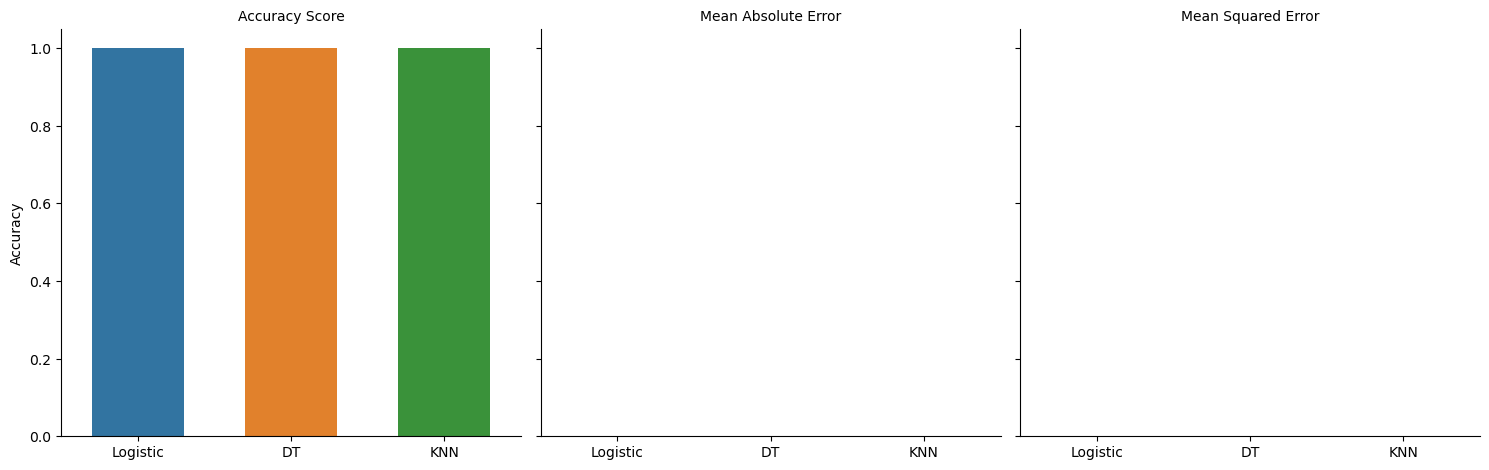

In [30]:
graph = sns.catplot(data=df2, x="Algorithm", y="Accuracy", col="metrics", kind="bar", width=0.6)
graph.set_axis_labels("", "Accuracy")
graph.set_titles("{col_name}")